## Data Processing

**Data Type** <br/>
* 名稱型 (nominal)
* 次序型 (ordinal)
* 區間型 (interval)
* 比例型 (ratio) <br/>
...

資料預處理的目的，就是在收集資料之後、開始進行分析之前，先行經過整理、清除，讓我們所使用的資料能有一定的可信度。這項工作是很重要的，因為資料分類與處理的品質，將會影響最後數據分析的結果。

- data cleaning
   noise, outlier, redundant data, missing values, ...
- data integration
- data transformation
- dimensionality reduction

## Python資料視覺化主要有三大套件：
- Seaborn
- Matplotlib
- Plotly

### Plot Types
* df.plot.area: 地區圖
* df.plot.barh: 水平長條圖
* df.plot.density: 機率密度圖???
* df.plot.hist: 直方圖
* df.plot.line: 折線圖
* df.plot.scatter: 散佈圖
* df.plot.bar: 垂直長條圖
* df.plot.box: 箱形圖
* df.plot.hexbin: 六邊箱圖
* df.plot.kde: 核密度估計圖
* df.plot.pie: 圓餅圖

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
# Use this line to see plots in the notebook
%matplotlib inline

In [3]:
df1 = pd.read_csv('data/df1',index_col=0)
df2 = pd.read_csv('data/df2')

In [4]:
df1.head()

,A,B,C,D
2000-01-01,1.339091,-0.163643,-0.646443,1.041233
2000-01-02,-0.774984,0.137034,-0.882716,-2.253382
2000-01-03,-0.921037,-0.482943,-0.417100,0.478638
2000-01-04,-1.738808,-0.072973,0.056517,0.015085
2000-01-05,-0.905980,1.778576,0.381918,0.291436


In [5]:
df2.head()

,a,b,c,d
0,0.039762,0.218517,0.103423,0.957904
1,0.937288,0.041567,0.899125,0.977680
2,0.780504,0.008948,0.557808,0.797510
3,0.672717,0.247870,0.264071,0.444358
4,0.053829,0.520124,0.552264,0.190008


**Histogram** 直方圖

<AxesSubplot:>

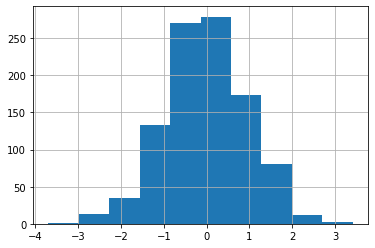

In [6]:
df1['A'].hist()

<AxesSubplot:ylabel='Frequency'>

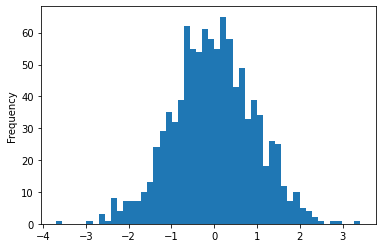

In [7]:
#改寬度
df1['A'].plot.hist(bins=50)

**Barplot**長條圖 <br/>
DataFrame裡的列索引會在x軸，欄索引鍵會在y軸。

<AxesSubplot:>

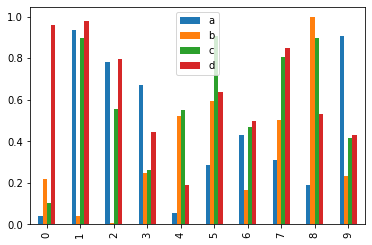

In [8]:
df2.plot.bar()

<AxesSubplot:>

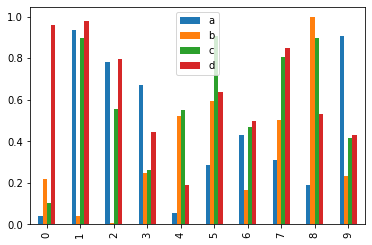

In [9]:
# alternative
df2.plot(kind='bar')

<AxesSubplot:>

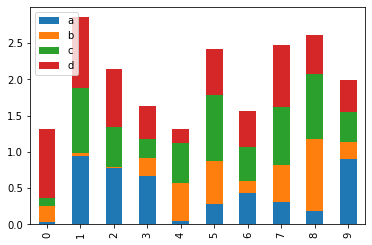

In [10]:
#堆疊
df2.plot.bar(stacked=True)

<AxesSubplot:>

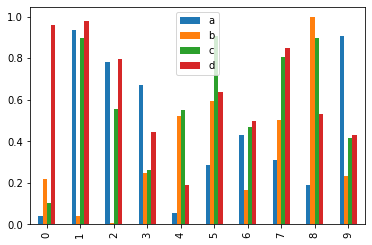

In [12]:
df2.plot.bar()
# alternative
df2.plot(kind='bar')

<AxesSubplot:>

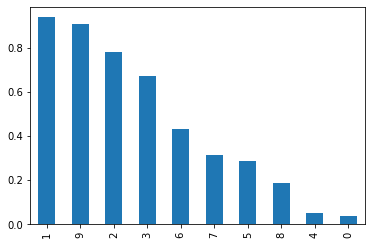

In [13]:
#降冪排列（預設升冪）
df2['a'].sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:>

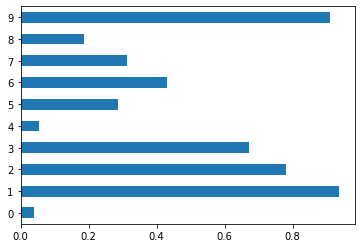

In [14]:
#橫的
df2['a'].plot(kind='barh')

**Pie Chart**圓餅圖 <br/>
當資料用圓餅圖呈現時，可以看出它占總體的百分比。

<AxesSubplot:ylabel='b'>

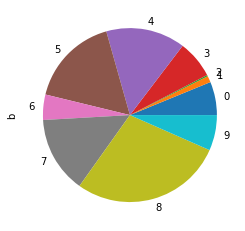

In [15]:
df2['b'].plot(kind='pie')

**BoxPlot**箱形圖 <br/>
中間箱子的兩端為第一四分位數（涵蓋25%之資料，Q1）與第三四分位數（涵蓋75%之資料，Q3），而箱子中間線為中位數（median）。<br/>
換言之，箱子涵蓋50%的資料。箱型外的圓圈，則是被判定成「異常值」。

<AxesSubplot:>

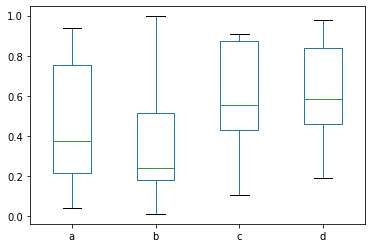

In [16]:
df2.plot.box()

**Kernel Density Estimation plot (KDE)**

<AxesSubplot:ylabel='Density'>

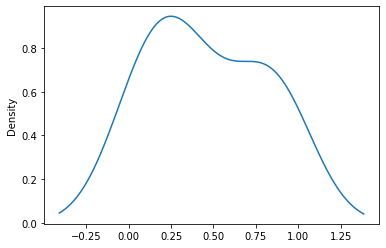

In [19]:
df2['a'].plot.kde()

**Line Plot**折線圖

<AxesSubplot:>

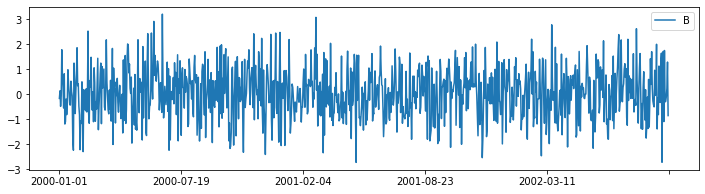

In [20]:
#時間序列
df1.plot.line(y='B',figsize=(12,3))

用seaborn資料集練習

In [21]:
import seaborn as sns

In [22]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='smoker'>

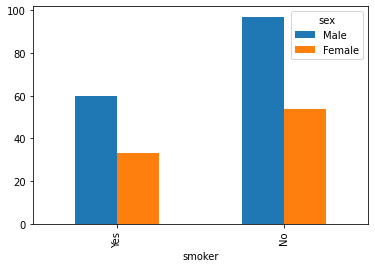

In [26]:
#二維分組 不堆疊
tips.groupby(['smoker','sex']).size().unstack(1).plot(kind='bar')

sex
Male      AxesSubplot(0.125,0.125;0.775x0.755)
Female    AxesSubplot(0.125,0.125;0.775x0.755)
Name: total_bill, dtype: object

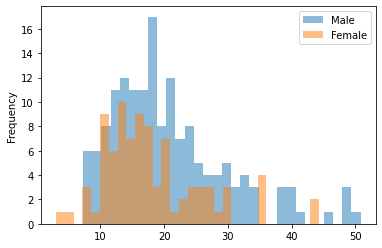

In [31]:
tips.groupby('sex')['total_bill'].plot(kind='hist', bins=30, alpha=0.5, legend=True) #alpha 是透明度的參數設定。

<AxesSubplot:title={'center':'total_bill'}, xlabel='sex'>

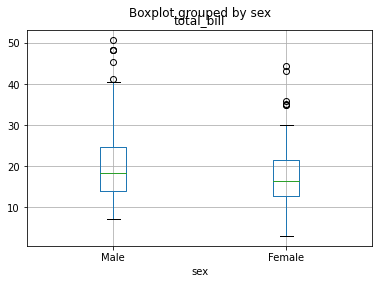

In [27]:
tips.boxplot(column='total_bill',by='sex')

**Scatter Plot**散佈圖

<AxesSubplot:xlabel='A', ylabel='B'>

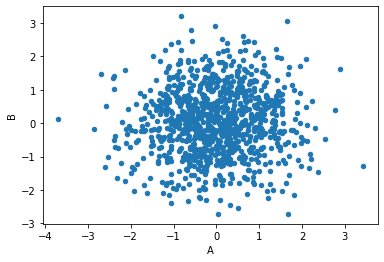

In [32]:
df1.plot.scatter(x='A',y='B')

<AxesSubplot:xlabel='A', ylabel='B'>

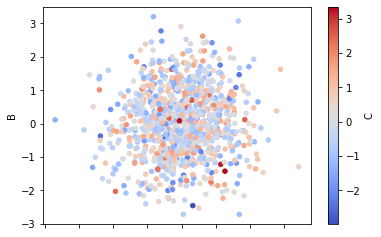

In [33]:
# color based off another column value (cmap)
df1.plot.scatter(x='A',y='B',c='C',cmap='coolwarm')

<AxesSubplot:xlabel='A', ylabel='B'>

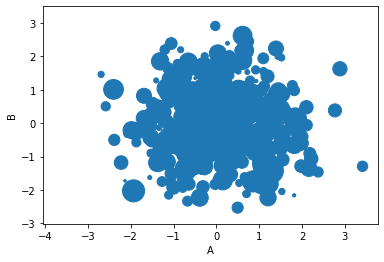

In [36]:
df1.plot.scatter(x='A',y='B',s=df1['C']*200)

For all the colormaps, check out: http://matplotlib.org/users/colormaps.html

**Hexagonal Bin Plot**六邊箱圖(直譯)

<AxesSubplot:xlabel='a', ylabel='b'>

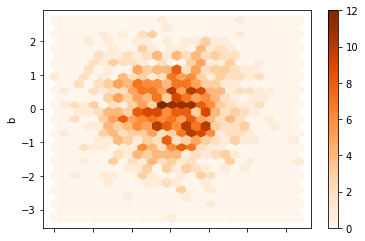

In [37]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])
df.plot.hexbin(x='a',y='b',gridsize=25,cmap='Oranges')

## Seaborn
seaborn為python繪圖函式庫，以matplotlib為基礎封裝了許多實用的統計圖表，相較於matplotlib，seaborn的預設圖形更為好看，語法更為簡潔，並且良好的支援了pandas函式庫。 <br/>

**優點：** 
1. 畫圖指令非常簡單
2. 圖案好看 <br/>

**缺點：**
1. 雖然99%的使用上都沒問題，但有些進階的圖案很難畫或是沒辦法畫（可用matplot互補）

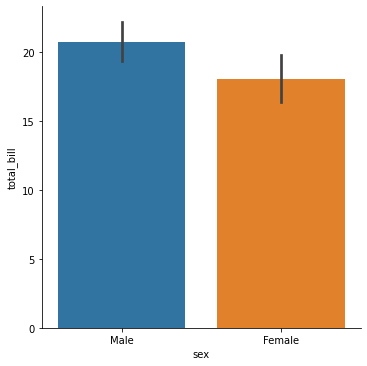

In [38]:
sns.catplot(x='sex',y='total_bill',data=tips, kind="bar")

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

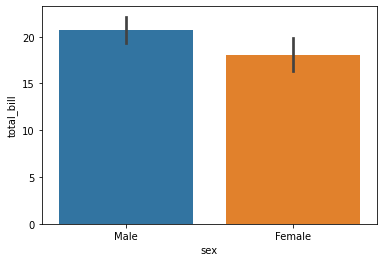

In [39]:
#Barplot
sns.barplot(x='sex',y='total_bill',data=tips)

<AxesSubplot:xlabel='sex', ylabel='count'>

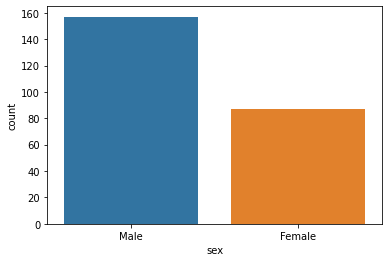

In [40]:
#countplot計數
sns.countplot(x='sex',data=tips)

<AxesSubplot:xlabel='sex', ylabel='count'>

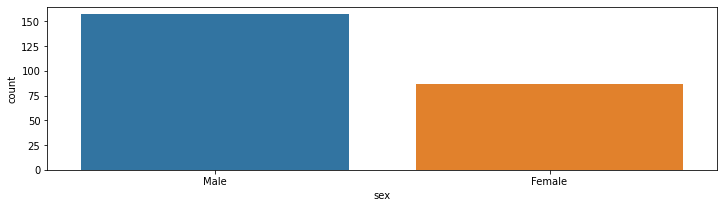

In [46]:
#調尺寸
plt.figure(figsize=(12,3))
sns.countplot(x='sex',data=tips)

In [47]:
#相關係數矩陣
# Matrix form for correlation data
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<AxesSubplot:>

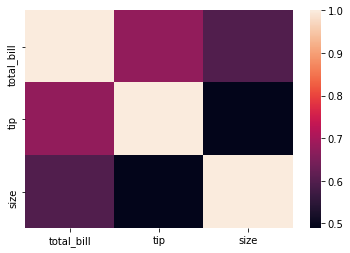

In [48]:
sns.heatmap(tips.corr())

<AxesSubplot:>

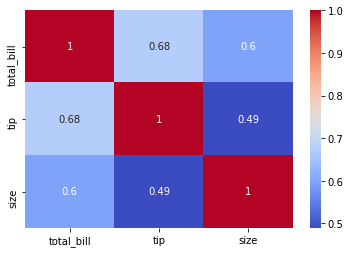

In [49]:
#改顏色
sns.heatmap(tips.corr(),cmap='coolwarm',annot=True)

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

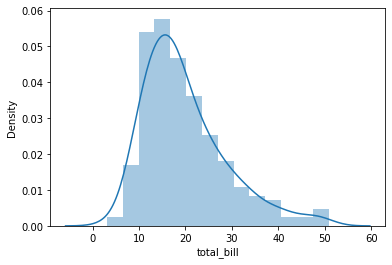

In [50]:
#displot
sns.distplot(tips['total_bill']) # Safe to ignore warnings

<AxesSubplot:xlabel='total_bill'>

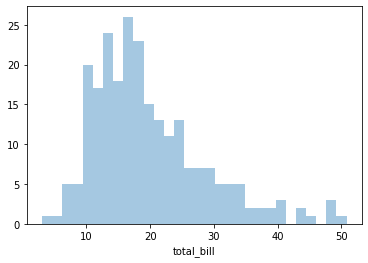

In [51]:
sns.distplot(tips['total_bill'],kde=False,bins=30)

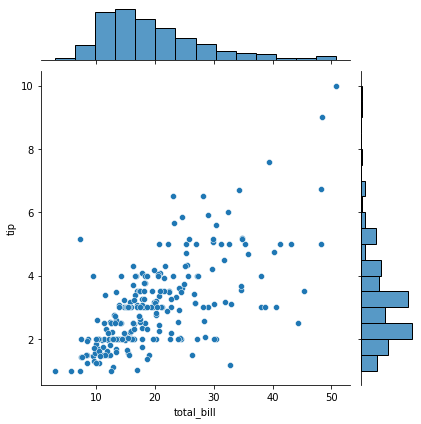

In [52]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter')

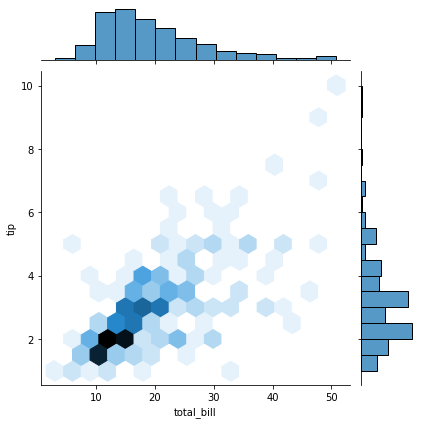

In [53]:
#六角形散點圖
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

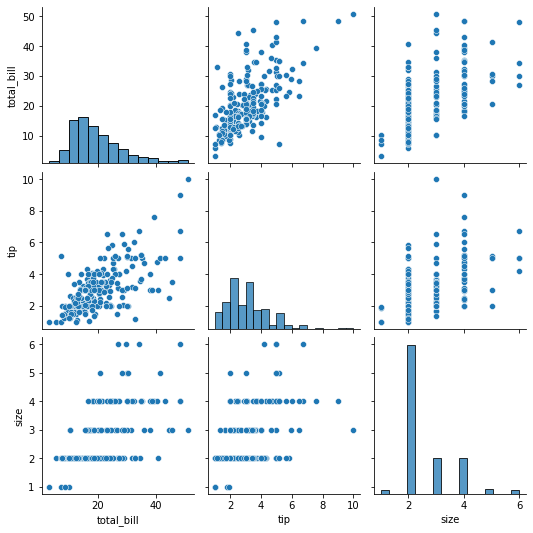

In [54]:
#資料量少時用
sns.pairplot(tips)

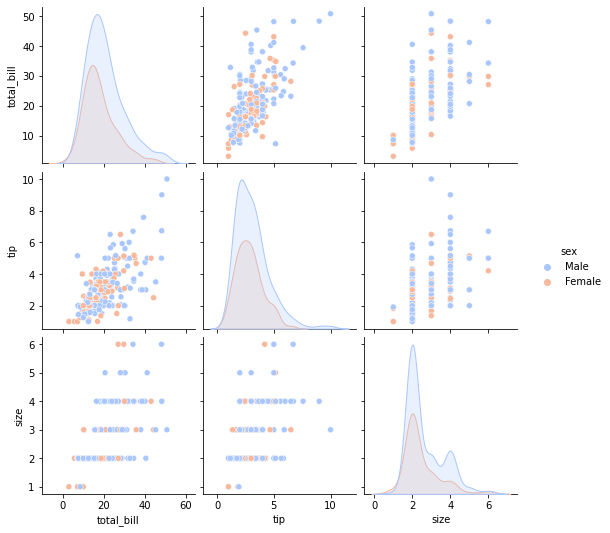

In [55]:
sns.pairplot(tips,hue='sex',palette='coolwarm')

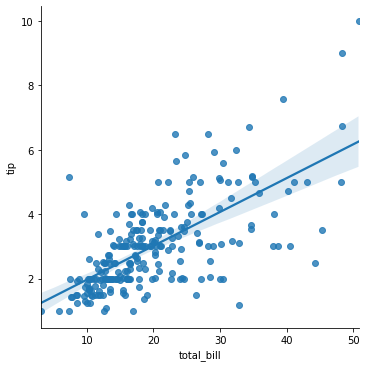

In [56]:
sns.lmplot(x='total_bill',y='tip',data=tips)

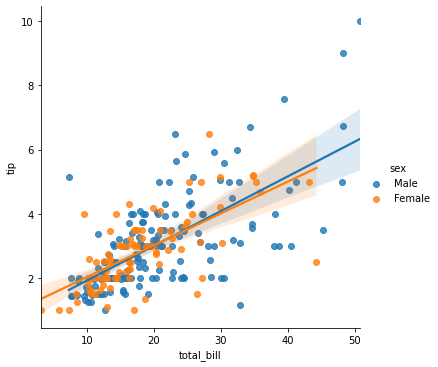

In [57]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex')

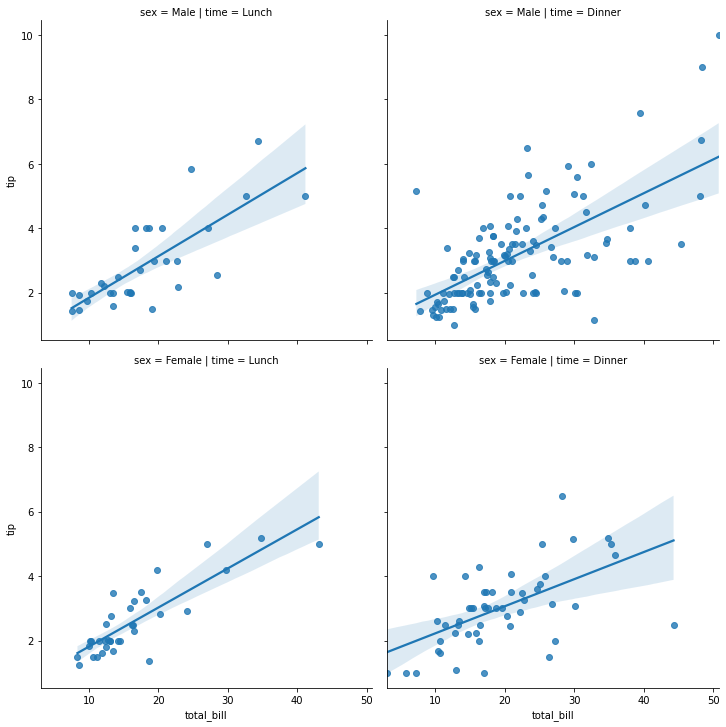

In [58]:
sns.lmplot(x="total_bill", y="tip", row="sex", col="time",data=tips)

## Matplotlib
**優點：**
1. 相較於其他視覺化套件，matplot算是最歷史悠久，因此有很多的教學文章或是範例可參考
2. 畫圖功能最齊全，基本上沒什麼圖表畫不出來的 <br/>

**缺點:**
1. 圖表不好看(新版的matplot其實也算好看，尤其在style功能出來之後可以自行切換圖表的風格)
2. 畫圖指令複雜

official Matplotlib web page: http://matplotlib.org/ <br/>

In [59]:
import matplotlib.pyplot as plt

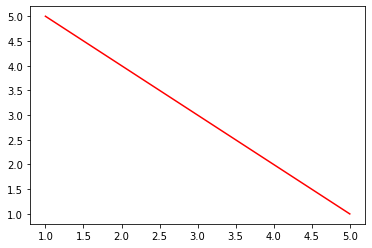

In [63]:
x=[5,4,3,2,1]
y=[1,2,3,4,5]
plt.plot(x,y,color='r') #可以改顏色 用英文字或色碼表
plt.show()

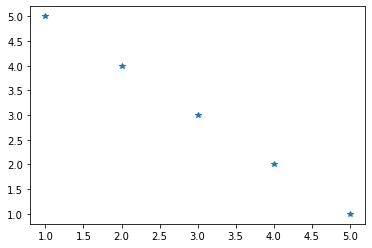

In [65]:
plt.plot(x,y,'*') #也可以改標記符號

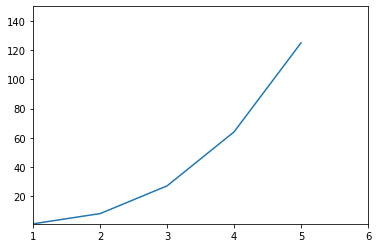

In [66]:
x=np.array([5,4,3,2,1])
y=pow(x,3)
plt.axis([1,6,1,150])
plt.plot(x,y)
plt.show()

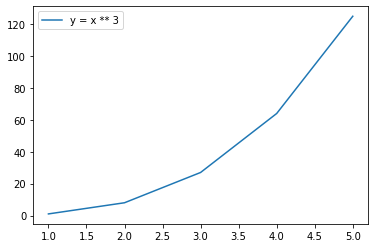

In [67]:
plt.plot(x,y,label='y = x ** 3')
plt.legend() #show圖例

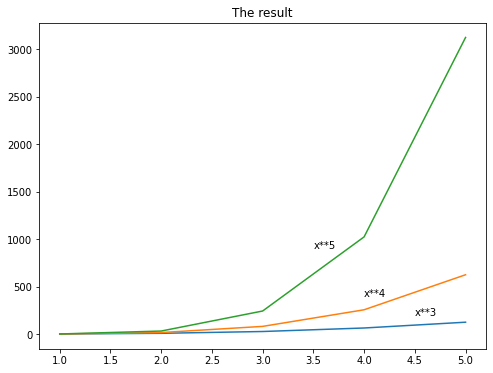

In [68]:
z=pow(x,4)
w=pow(x,5)
plt.figure(figsize=(8,6))
plt.plot(x,y)
plt.plot(x,z)
plt.plot(x,w)
plt.title("The result")
plt.text(4.5,200,'x**3')
plt.text(4,400,'x**4')
plt.text(3.5,900,'x**5')
plt.show()

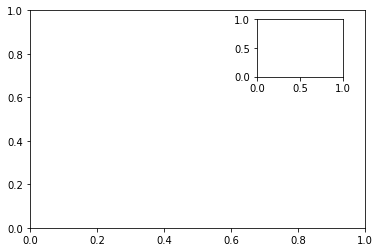

In [69]:
plt.subplots()
plt.axes()
plt.axes([0.65,0.65,0.2,0.2])

# HW

使用TITANIC的資料繪圖

In [70]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<AxesSubplot:ylabel='Frequency'>

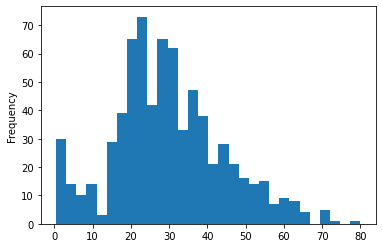

In [71]:
#繪製age的直方圖, 區間值設為30
df['age'].plot.hist(bins=30)

In [77]:
#製作survived和sex的交叉表
df.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


<AxesSubplot:>

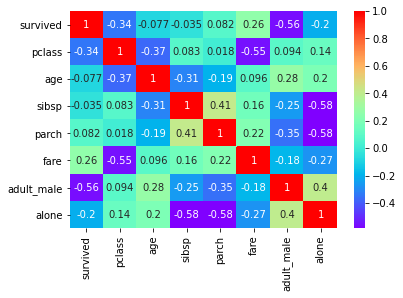

In [81]:
sns.heatmap(df.corr(),cmap='rainbow',annot=True)

survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: age, dtype: object

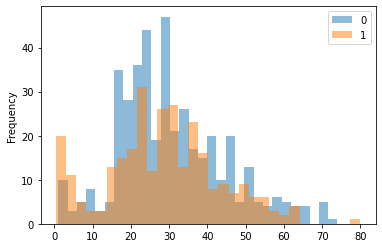

In [73]:
#製作survived和age的圖。將依存活與否分成兩組，再將兩組的資料分別用直方圖來呈現。畫在同一格表格上

df.groupby('survived')['age'].plot(kind='hist', bins=30, alpha=0.5, legend=True) 

<AxesSubplot:title={'center':'age'}, xlabel='survived'>

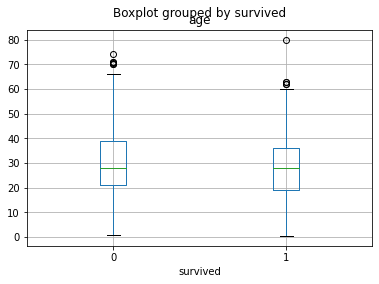

In [76]:
#用箱型圖來呈現
df.boxplot(column='age',by='survived')

<AxesSubplot:xlabel='class'>

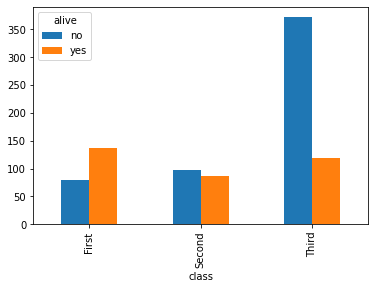

In [107]:
#自由發揮1(比較各艙等的存活數)
df.groupby(['class','alive']).size().unstack(1).plot(kind='bar')

<AxesSubplot:xlabel='embark_town', ylabel='count'>

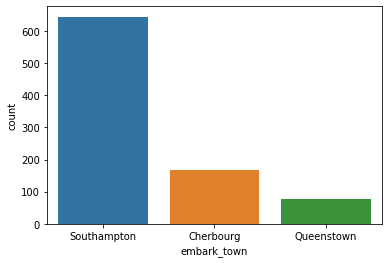

In [116]:
#自由發揮2(人大多從哪出發)
sns.countplot(x='embark_town',data=df)

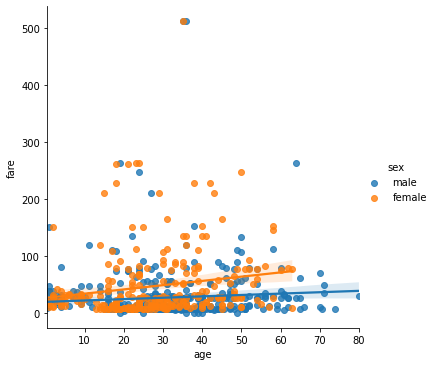

In [109]:
#自由發揮3(年齡vs票價 用性別分組)

sns.lmplot(x='age',y='fare',data=df,hue='sex')